In [1]:
from probe_experiment import *
from handcrafted_datasets import Dataset
from models import *
import torch
import torch.nn as nn
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dataset = Dataset('rank', 'C:\\Users\\andre\\go-ai\\data', 0.8, 0.2, 1024)

def get_train_loader():
    dataset.shuffle('train')
    return dataset.loader('train', max_ram_files=25)

def get_test_loader():
    return dataset.loader('test', max_ram_files=25)

done loading data
split sizes:
train 552
test 138


In [3]:
def unsqueezeBCE(pred, target):
    return torch.nn.BCEWithLogitsLoss()(pred, target.unsqueeze(dim=1))
criterion = unsqueezeBCE

In [4]:
go_model = load_go_model_from_ckpt('model_ckpt.pth.tar', rm_prefix=True)
feat_models = [CutModel(go_model, i).cuda() for i in range(8)]
n_channels = [8, 64, 64, 64, 48, 48, 32, 32]
probe_models = [nn.Sequential(nn.Flatten(), nn.Linear(nc*19*19, 1)).cuda() for nc in n_channels]

In [5]:
aucs = []
for depth in range(0, 8):
    print('probing at depth %d' % depth)
    feat_model = feat_models[depth]
    probe_model = probe_models[depth]
    exp = ProbeExperiment(get_train_loader, get_test_loader, feat_model)
    config = {'name':'rank/rank_d%d'%depth, 'write_log':True, 'progress_bar':True, 'save_ckpt':False}
    optimizer = torch.optim.Adam(probe_model.parameters())
    exp.run(probe_model, criterion, optimizer, 5, config)
    preds, labels = exp.get_predictions(probe_model, get_test_loader())
    auc = roc_auc_score(labels, preds)
    aucs.append(auc)
    print(auc)

probing at depth 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:44<00:00, 12.34it/s]


[LOG] epoch 0 loss 0.412857, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.335245, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.295433, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.271430, new best


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:35<00:00, 15.52it/s]


[LOG] epoch 4 loss 0.254048, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.9668172593061309
probing at depth 1


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.195700, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.207981


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.195011, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.189180, new best


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:36<00:00, 15.11it/s]


[LOG] epoch 4 loss 0.202521


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.9785418400223713
probing at depth 2


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.206051, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.192527, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.187920, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.193336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:48<00:00, 11.46it/s]


[LOG] epoch 4 loss 0.201175


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.9777379172115686
probing at depth 3


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.257243, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.273833


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.233305, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.234289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:02<00:00,  8.80it/s]


[LOG] epoch 4 loss 0.254794


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.971852214809998
probing at depth 4


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.296741, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.284760, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.298496


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.320080


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:17<00:00,  7.08it/s]


[LOG] epoch 4 loss 0.326690


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.9528293648585038
probing at depth 5


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.352794, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.341450, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.341500


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.344324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:27<00:00,  6.29it/s]


[LOG] epoch 4 loss 0.350512


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.9281685539971866
probing at depth 6


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.476929, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.450684, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.439409, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.433217, new best


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:32<00:00,  5.98it/s]


[LOG] epoch 4 loss 0.430091, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.8760561208671004
probing at depth 7


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.534150, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.498318, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.480841, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.470256, new best


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:39<00:00,  5.57it/s]


[LOG] epoch 4 loss 0.463318, new best
0.8572637612382022


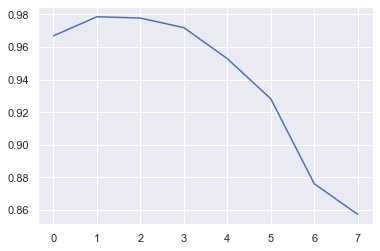

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.plot([0.9668172593061309, 0.9785418400223713, 0.9777379172115686, 0.971852214809998,
          0.9528293648585038, 0.9281685539971866, 0.8760561208671004, 0.8572637612382022])